In [8]:
include("../../../julia/FNC_init.jl")

  Activating project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-methodlines-auto)

We set up the semidiscretization and initial condition in $x$ just as before.

In [9]:
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1])
u0 = @. exp( -60*(x - 0.5)^2 );

Now, however, we apply {numref}`Function {number} <function-rk23>` (`rk23`) to the initial-value problem $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

In [10]:
using OrdinaryDiffEq
tfinal = 0.25
ODE = (u, p, t) -> Dxx * u  
IVP = ODEProblem(ODE, u0, (0, tfinal))
t, u = FNC.rk23(IVP, 1e-5);

We check that the resulting solution looks realistic.

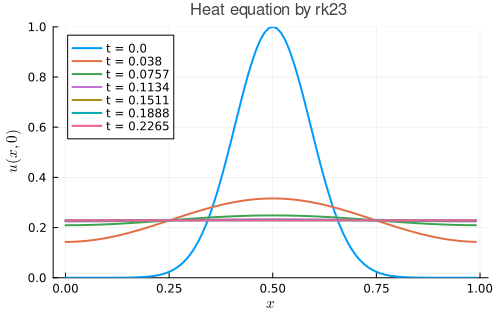

In [11]:
plt = plot(
    title="Heat equation by rk23",
    legend=:topleft,  
    xaxis=(L"x"),  yaxis=(L"u(x,0)", [0, 1]))
for idx in 1:600:length(t)
    plot!(x, u[idx]; label="t = $(round.(t[idx], digits=4))")
end
plt

In [12]:
anim = @animate for j in 1:20:1600
    plot(x, u[j];
    label=@sprintf("t=%.4f", t[j]),
      xaxis=(L"x"),  yaxis=(L"u(x,t)", [0, 1]),
      dpi=150,  title="Heat equation by rk23")
end
mp4(anim, "diffusionRK23.mp4")

┌ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc/chapter11/section2/julia/diffusionRK23.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/FFuQi/src/animation.jl:156


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc/chapter11/section2/julia/diffusionRK23.mp4")

The solution appears to be correct. But the number of time steps that were selected automatically is surprisingly large, considering how smoothly the solution changes.

In [13]:
println("Number of time steps for rk23: $(length(t)-1)")

Number of time steps for rk23: 3975


Now we apply a solver from `DifferentialEquations`.

In [14]:
u = solve(IVP, Rodas4P());
println("Number of time steps for Rodas4P: $(length(u.t) - 1)")

Number of time steps for Rodas4P: 23


The number of steps selected is reduced by a factor of more than 100!